# Portfolio 4 by bilal moustafa 46990259

 

### The world health organisation (WHO) has previously released data that shows that stroke is the second largest cause of death. therefore , in this portfolio we will be focusing on obtaining the biological/enviromental factors that have the greatest effect in increasing the probability of an individual to be diagnosed with a stroke. moreover, in this study, we are dealing with a classification problem and we will be building a logisitcal model and a K-Nearest Neighbours Classifier model to find out which model gives us the best accuracy when predicting a stroke

## describtion of fields

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient(will be considered as Nan in this study)

dataset link :https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# cleaning and exploring the dataset

In [5]:
df = pd.read_csv('files/healthcare-dataset-stroke-data.csv')
print('length of original data:',len(df))
print('shape of original data:',df.shape)

length of original data: 5110
shape of original data: (5110, 12)


In [6]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
user_array = df['id'].unique()
print('the number of unique users is ', user_array.size)

the number of unique users is  5110


In [8]:
#check type of smokers in column to know what to clean

df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [9]:
#check how many genders we have in the dataset to know what to clean

df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#clean the data from any null values
clean_stroke=df.dropna()
# clean the data from other gender and unknown smoking statues
clean_stroke.drop(clean_stroke[clean_stroke['gender']=='Other'].index,inplace=True)
clean_stroke.drop(clean_stroke[clean_stroke['smoking_status']=='Unknown'].index,inplace=True)
print('shape of dataset before cleaning:',df.shape)
print('shape of dataset after cleaning:',clean_stroke.shape)

shape of dataset before cleaning: (5110, 12)
shape of dataset after cleaning: (3425, 12)


C:\Users\user\anaconda3\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
#check if our new data is cleaned
clean_stroke.gender.value_counts()

Female    2086
Male      1339
Name: gender, dtype: int64

In [13]:
#check if our new data is cleaned
clean_stroke.smoking_status.value_counts()

never smoked       1852
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [14]:
# drop user id since it has no use in this study
clean_stroke = clean_stroke.drop(columns=['id'])
clean_stroke.shape

(3425, 11)

In [15]:
#make sure our data is clean before we proceed

clean_stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## understanding the data through visualization

[Text(0.5, 1.0, 'stroke by age')]

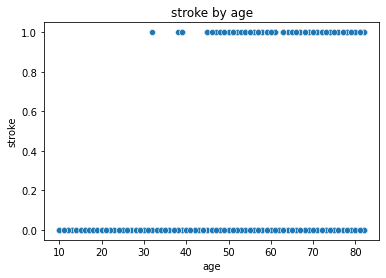

In [16]:
sns.scatterplot(data=clean_stroke, x='age', y='stroke').set(title='stroke by age')

#### as we can observe , all ages under 30 years old have no stroke however, rather than considering it as an outlier, we will keep it in the dataset as it will help our models to better understand what the younger ages dont have which will be helpful in predicting what doesnt affect strokes

<AxesSubplot:title={'center':'age distribution'}, ylabel='Frequency'>

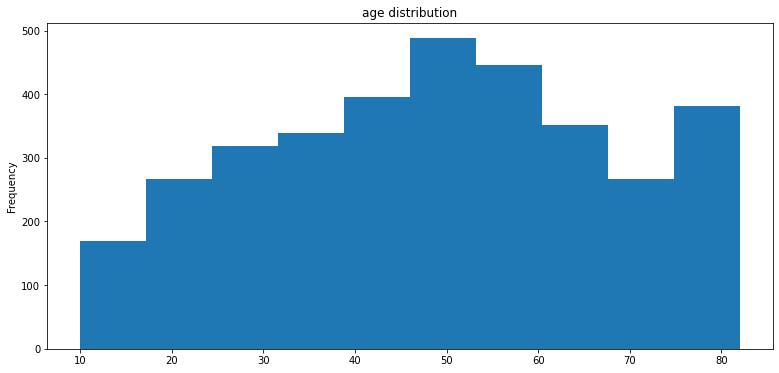

In [17]:
clean_stroke['age'].plot(kind='hist',figsize=(13, 6),title='age distribution')

[Text(0.5, 1.0, 'age by gender')]

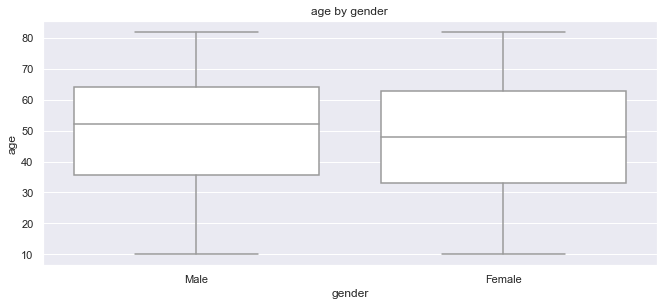

In [18]:
plt.figure(figsize=(11,4.5))
sns.set_theme(style="darkgrid")
sns.boxplot(data=clean_stroke,x='gender',y='age',color='white').set(title='age by gender')

[Text(0.5, 1.0, 'count distribution by gender')]

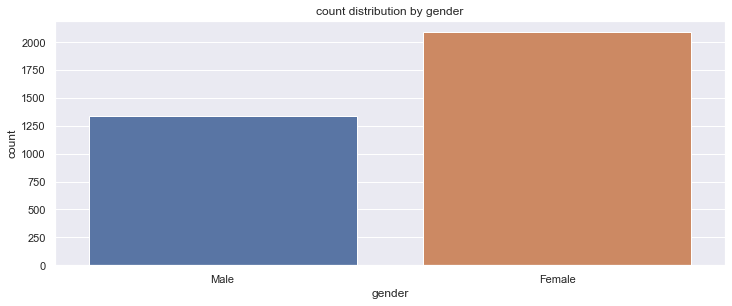

In [19]:
plt.figure(figsize=(12,4.5))
sns.countplot(data = clean_stroke,x = 'gender').set(title='count distribution by gender')

[Text(0.5, 1.0, 'stroke count distribution by gender')]

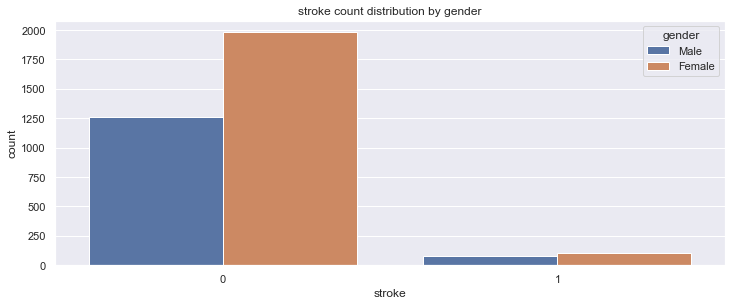

In [20]:
plt.figure(figsize=(12,4.5))
sns.countplot(data = clean_stroke,x = 'stroke',hue='gender').set(title='stroke count distribution by gender')

#### from the visualisations, we can observe that the female count is significantly higher than the male count in this study, however from the above graph , we can observe that gender probably does not have an effect on predicting a stroke but we will study that later when we do the correlations.


## -descriptive statistics

In [21]:
clean_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,48.652555,0.119124,0.060146,108.311670,30.292350,0.052555
std,18.850018,0.323982,0.237792,47.706754,7.295778,0.223175
min,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,34.000000,0.000000,0.000000,77.230000,25.300000,0.000000
50%,50.000000,0.000000,0.000000,92.350000,29.100000,0.000000
75%,63.000000,0.000000,0.000000,116.200000,34.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [22]:
occupation_array = clean_stroke['work_type'].unique()
print('the number of unique work_type is ',occupation_array.size)

residence_array = clean_stroke['Residence_type'].unique()
print('the number of unique residence type is ',residence_array.size)

the number of unique work_type is  5
the number of unique residence type is  2


In [23]:
clean_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 450.1+ KB


## convert all fields into the same and proper data type format to start the study

In [24]:
#convert all float values into int 

clean_stroke['age'] = clean_stroke['age'].astype(np.int64)
clean_stroke['avg_glucose_level'] = clean_stroke['avg_glucose_level'].astype(np.int64)
clean_stroke['bmi'] = clean_stroke['bmi'].astype(np.int64)

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# convert categorical values into numerial values, e.g., genre -> genre_code
ord_enc = OrdinalEncoder(dtype=int)
clean_stroke[["smoking_status_code", "gender_code", "ever_married_code","work_type_code","Residence_type_code"]] = ord_enc.fit_transform(clean_stroke[["smoking_status", "gender", "ever_married","work_type","Residence_type"]])
clean_stroke[["smoking_status_code", "smoking_status", "gender_code", "gender", "ever_married_code", "ever_married","work_type_code","work_type","Residence_type_code","Residence_type"]].head(11)

,smoking_status_code,smoking_status,gender_code,gender,ever_married_code,ever_married,work_type_code,work_type,Residence_type_code,Residence_type
0,0,formerly smoked,1,Male,1,Yes,2,Private,1,Urban
2,1,never smoked,1,Male,1,Yes,2,Private,0,Rural
3,2,smokes,0,Female,1,Yes,2,Private,1,Urban
4,1,never smoked,0,Female,1,Yes,3,Self-employed,0,Rural
5,0,formerly smoked,1,Male,1,Yes,2,Private,1,Urban
6,1,never smoked,1,Male,1,Yes,2,Private,0,Rural
7,1,never smoked,0,Female,0,No,2,Private,1,Urban
10,1,never smoked,0,Female,1,Yes,2,Private,0,Rural
11,2,smokes,0,Female,1,Yes,0,Govt_job,0,Rural
12,2,smokes,0,Female,1,Yes,2,Private,1,Urban


In [26]:
clean_stroke.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_code,gender_code,ever_married_code,work_type_code,Residence_type_code
0,Male,67,0,1,Yes,Private,Urban,228,36,formerly smoked,1,0,1,1,2,1
2,Male,80,0,1,Yes,Private,Rural,105,32,never smoked,1,1,1,1,2,0
3,Female,49,0,0,Yes,Private,Urban,171,34,smokes,1,2,0,1,2,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24,never smoked,1,1,0,1,3,0
5,Male,81,0,0,Yes,Private,Urban,186,29,formerly smoked,1,0,1,1,2,1


In [27]:
#check correlation with stroke
clean_stroke[clean_stroke.columns[1:]].corr()['stroke'][:-1]

age                    0.242465
hypertension           0.143626
heart_disease          0.138538
avg_glucose_level      0.140545
bmi                    0.011779
stroke                 1.000000
smoking_status_code   -0.024730
gender_code            0.012413
ever_married_code      0.071603
work_type_code         0.023350
Name: stroke, dtype: float64

#### as we can observe, age,hypertension,heart_disease, and avg glucose level have the most effect on causing a stroke and have a positive direct correlation with stroke and therefore these 4 attributes will be the most helpfull for us when we want to predict if a person is vulnerable to a stroke 

In [28]:
stroke_prediction=clean_stroke[['age','hypertension','heart_disease','avg_glucose_level','stroke']]
stroke_prediction

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67,0,1,228,1
2,80,0,1,105,1
3,49,0,0,171,1
4,79,1,0,174,1
5,81,0,0,186,1
...,...,...,...,...,...
5100,82,1,0,71,0
5102,57,0,0,77,0
5106,81,0,0,125,0
5107,35,0,0,82,0


<AxesSubplot:>

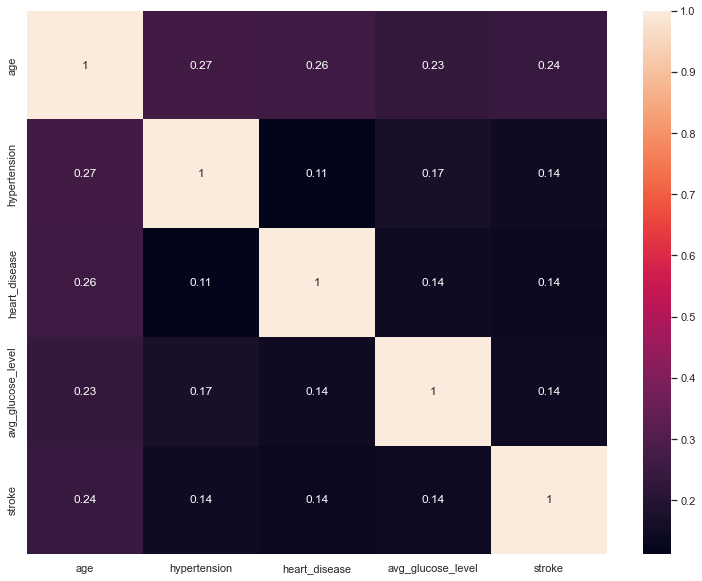

In [29]:
# checking corr using heatmap
plt.figure(figsize=(13,10))
sns.heatmap(stroke_prediction.corr(method='pearson'), annot=True)

# Baseline model (logistic regression model)

In [30]:
#spliting our model into train and test
train, test = train_test_split(stroke_prediction, test_size=0.2, random_state=142)
print("shape of the training data :",train.shape)
print("shape of the testing data :",test.shape)

shape of the training data : (2740, 5)
shape of the testing data : (685, 5)


In [31]:
#build our logistic model with our desired features to predict stroke
feature_cols=['age','hypertension','heart_disease','avg_glucose_level']
X_train = train[feature_cols]
y_train = train['stroke']
X_test = test[feature_cols]
y_test = test['stroke']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (2740, 4)
y_train shape:  (2740,)
X_test shape:  (685, 4)
y_test shape:  (685,)
      age  hypertension  heart_disease  avg_glucose_level
3237   36             0              0                 91
240    66             0              0                 76
388    55             0              0                 97
1775   63             1              0                 96
4655   10             0              0                 57
3237    0
240     1
388     0
1775    0
4655    0
Name: stroke, dtype: int64


In [32]:
# Training Logistic Regression model
model = LogisticRegression(C=1e9)
model.fit(X_train, y_train)


LogisticRegression(C=1000000000.0)

In [33]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [34]:
# Evaluate the performance of the trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.9452554744525548
Accuracy score on testing set:  0.9562043795620438


In [35]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[654   0]
 [ 30   1]]


In [36]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[2589    2]
 [ 148    1]]


# K-Nearest Neighbours Classifier

In [52]:
feature_cols = np.array(['age', 'gender_code', 'hypertension','heart_disease','ever_married_code','work_type_code','Residence_type_code','avg_glucose_level','bmi','smoking_status_code'])
X = clean_stroke[feature_cols]
y = clean_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 8)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.948905109489051


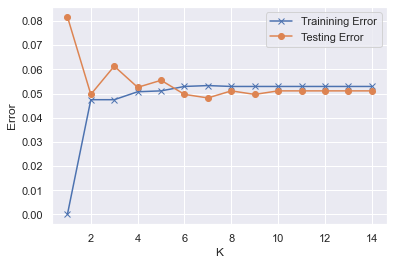

In [66]:
training_error=list()
testing_error=list()

for i in range(1, 15):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 15), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 15), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [67]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 12)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X_train, y_train)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  8
The accuracy:  0.947080291970803


In [68]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 11)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.94890511 0.94890511 0.94890511 0.94890511 0.94890511 0.94525547
 0.94525547 0.94525547 0.94525547 0.94525547]
Average accuracy: 0.9471 +- 0.0018


In [84]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1, 20, 5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(X, y)

print('Best K value: ', gs_knn.best_params_['n_neighbors'])
print('The accuracy: %.4f\n' % gs_knn.best_score_)

Best K value:  6
The accuracy: 0.9474



## compare our models accuracy

<BarContainer object of 2 artists>

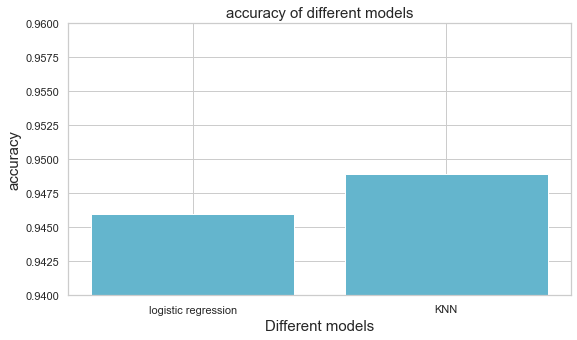

In [88]:
train_score= accuracy_score(y_train, y_hat_train)

#create a dataset with the accuracy score of both models
accuracy_df = pd.DataFrame({'accuracy score': [train_score,accuracy]}, index=['training_accuracy', 'knn'])


#visualise the models
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
plt.ylim(0.94,0.96)
plt.xlabel('Different models', size=15)
plt.ylabel('accuracy', size=15)
plt.title("accuracy of different models", size=15)
plt.bar(data=accuracy_df, height='accuracy score', x=['logistic regression', 'KNN'], color='c')

## conclusion: our study shows that this dataset requires a classification model since we used both a simple and advanced classification model and we got a really high accuracy from both models of around 95%. however the K-Nearest Neighbours Classifier had a slightly higher accuracy than the simple logistic regression model .